In [26]:
# Weather 
# Dependencies 
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import random
from citipy import citipy
from datetime import datetime 
from config import weather_api_key
import requests
import time
from scipy.stats import linregress

In [2]:
# Create list for weather data
city_data = []

# Print the beginning of the logging
print("Beginning Data Retrieval     ")
print("-----------------------------")
# Create counters
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [3]:
# Create basic url for API
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [4]:
# Create 1500 random latitude and longitude coordinates 
latitudes = np.random.uniform(-90, 90, size = 1500)
longitudes = np.random.uniform(-180, 180, size = 1500)
coordinates = zip(latitudes, longitudes)
coordinates

In [5]:
# Add coordinates to a list 
coordinates_lst = list(coordinates)

In [6]:
# Create list for cities 
cities = []

# Use citipy to find nearest cities using coordinate list
for coordinate in coordinates_lst:
    city = citipy.nearest_city(coordinate[0],coordinate[1])
    city_name = city.city_name
    country_name = city.country_code
    
    # Find unique cities to add to cities list
    if city_name not in cities:
        cities.append(city_name)
    
    # See cities and contries
    # print(f'{city_name}, {country_name}')

# Count amount of unique cities
len(cities)

620

In [7]:
# Loop through city Lists 
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 
    if (i % 50 == 0 and i >= 50):
        set_count += 1 
        record_count = 1 
    
    # Create URL for each city
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log URL, set, and record numbers for each city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    record_count += 1

# Make an API request for each city 
    try:
       
        # Parse the JSON data
        city_weather = requests.get(city_url).json()

        # Compile needed data
        city_city = city.title()
        city_country = city_weather['sys']['country']
        city_date = datetime.utcfromtimestamp(city_weather['dt']).strftime('%Y-%m-%d %H:%M:%S')
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_hum = city_weather['main']['humidity']
        city_cloud = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']

        # Fill City Data list 
        city_data.append({"City": city_city,
                         "Country": city_country,
                         "Date": city_date,
                         "Lat": city_lat,
                         "Lng": city_lng,
                         "Max Temp": city_max_temp,
                         "Humidity": city_hum,
                         "Cloudiness": city_cloud,
                         "Wind Speed": city_wind,
                         })
    #If an error occurs
    except: 
        print("City not found. Skipping")
        pass

    # Complete Data Retrieval    
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | jamestown
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | kolosovka
Processing Record 4 of Set 1 | soyo
Processing Record 5 of Set 1 | tigil
Processing Record 6 of Set 1 | port macquarie
Processing Record 7 of Set 1 | vao
Processing Record 8 of Set 1 | hermanus
Processing Record 9 of Set 1 | wajima
Processing Record 10 of Set 1 | arcachon
Processing Record 11 of Set 1 | buluang
Processing Record 12 of Set 1 | iqaluit
Processing Record 13 of Set 1 | bluff
Processing Record 14 of Set 1 | merauke
Processing Record 15 of Set 1 | tuburan
Processing Record 16 of Set 1 | college
Processing Record 17 of Set 1 | punta arenas
Processing Record 18 of Set 1 | oistins
Processing Record 19 of Set 1 | taolanaro
City not found. Skipping
Processing Record 20 of Set 1 | albany
Processing Record 21 of Set 1 | mar del plata
Processing Record 22 of Set 1 | sivas
Processing Record 23 of Set 1 | altay
Processing Record 24 of Set 1 | ilulissat
Processing Re

Processing Record 40 of Set 4 | tandalti
Processing Record 41 of Set 4 | plymouth
Processing Record 42 of Set 4 | leningradskiy
Processing Record 43 of Set 4 | saint anthony
Processing Record 44 of Set 4 | denizli
Processing Record 45 of Set 4 | walvis bay
Processing Record 46 of Set 4 | mercedes
Processing Record 47 of Set 4 | tequixquitla
Processing Record 48 of Set 4 | shangrao
Processing Record 49 of Set 4 | taoudenni
Processing Record 50 of Set 4 | praya
Processing Record 1 of Set 5 | tiruvottiyur
City not found. Skipping
Processing Record 2 of Set 5 | socorro
Processing Record 3 of Set 5 | fairbanks
Processing Record 4 of Set 5 | wajir
Processing Record 5 of Set 5 | faanui
Processing Record 6 of Set 5 | canon city
Processing Record 7 of Set 5 | isangel
Processing Record 8 of Set 5 | lipari
Processing Record 9 of Set 5 | pando
Processing Record 10 of Set 5 | aljezur
Processing Record 11 of Set 5 | ingham
Processing Record 12 of Set 5 | svetlyy
Processing Record 13 of Set 5 | broom

Processing Record 31 of Set 8 | port augusta
Processing Record 32 of Set 8 | razole
Processing Record 33 of Set 8 | baruun-urt
Processing Record 34 of Set 8 | alta gracia
Processing Record 35 of Set 8 | alboraya
Processing Record 36 of Set 8 | vanavara
Processing Record 37 of Set 8 | port hedland
Processing Record 38 of Set 8 | kathu
Processing Record 39 of Set 8 | burnie
Processing Record 40 of Set 8 | osypenko
Processing Record 41 of Set 8 | vrbove
Processing Record 42 of Set 8 | atar
Processing Record 43 of Set 8 | tuatapere
Processing Record 44 of Set 8 | vostok
Processing Record 45 of Set 8 | sept-iles
Processing Record 46 of Set 8 | cabanas
Processing Record 47 of Set 8 | jacksonville beach
Processing Record 48 of Set 8 | vung tau
Processing Record 49 of Set 8 | bargal
City not found. Skipping
Processing Record 50 of Set 8 | bubaque
Processing Record 1 of Set 9 | tabukiniberu
City not found. Skipping
Processing Record 2 of Set 9 | camargo
Processing Record 3 of Set 9 | harper
Pro

Processing Record 19 of Set 12 | hovd
Processing Record 20 of Set 12 | morondava
Processing Record 21 of Set 12 | warqla
City not found. Skipping
Processing Record 22 of Set 12 | sosva
Processing Record 23 of Set 12 | senador jose porfirio
Processing Record 24 of Set 12 | halalo
City not found. Skipping
Processing Record 25 of Set 12 | launceston
Processing Record 26 of Set 12 | dakar
Processing Record 27 of Set 12 | gogrial
Processing Record 28 of Set 12 | veracruz
Processing Record 29 of Set 12 | rivne
Processing Record 30 of Set 12 | jibuti
Processing Record 31 of Set 12 | swan hill
Processing Record 32 of Set 12 | salinas
Processing Record 33 of Set 12 | katobu
Processing Record 34 of Set 12 | muroto
Processing Record 35 of Set 12 | dunedin
Processing Record 36 of Set 12 | zemio
Processing Record 37 of Set 12 | taldan
Processing Record 38 of Set 12 | takaka
Processing Record 39 of Set 12 | zabid
Processing Record 40 of Set 12 | nuuk
Processing Record 41 of Set 12 | kasongo-lunda
Pr

In [8]:
len(city_data)

574

In [9]:
# Add the data to a list in a dict then at the DF
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Jamestown,US,2021-05-24 03:22:24,42.0970,-79.2353,65.52,94,90,4.61
1,Rikitea,PF,2021-05-24 03:21:17,-23.1203,-134.9692,74.95,74,37,4.36
2,Kolosovka,RU,2021-05-24 03:22:24,56.4678,73.6110,66.31,67,67,8.10
3,Soyo,AO,2021-05-24 03:22:25,-6.1349,12.3689,76.91,89,86,6.58
4,Tigil,RU,2021-05-24 03:22:25,57.8000,158.6667,47.77,50,4,18.32


In [10]:
# Create CSV file of DF
csv_weather_file = "weather_data/cities.csv"
# Export CSV file 
city_data_df.to_csv(csv_weather_file, index_label="City_ID")

In [11]:
#Plot Weather Data
# Pull revelant Data from DF

lat = city_data_df["Lat"]
max_temp = city_data_df["Max Temp"]
hum = city_data_df["Humidity"]
clouds = city_data_df["Cloudiness"]
wind = city_data_df["Wind Speed"]

<function matplotlib.pyplot.show(close=None, block=None)>

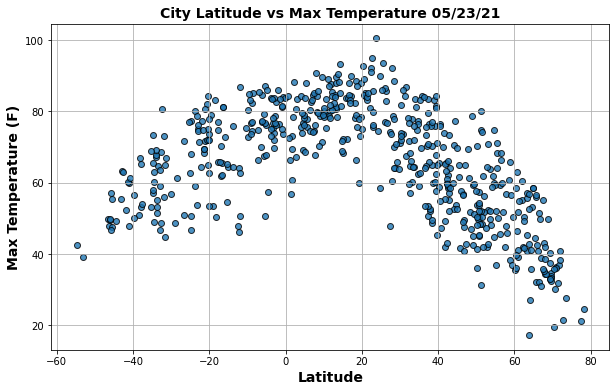

In [12]:
# Latitude vs Max Temperature
# Create Scatter Chart for Lat vs Max Temp
plt.subplots(figsize=(10,6))
plt.scatter(lat, max_temp, label='cities', 
            edgecolor='black', linewidths=1, 
            alpha=0.8, marker='o')

# Add title and labels 
plt.title(f"City Latitude vs Max Temperature " + time.strftime('%x'),
          fontweight='semibold', fontsize=14)
plt.xlabel("Latitude", fontweight='semibold', fontsize=14)
plt.ylabel("Max Temperature (F)",fontweight='semibold', fontsize=14)

# Add Grid
plt.grid()

# Save Fig and show 
plt.savefig('weather_data/Fig1.png')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

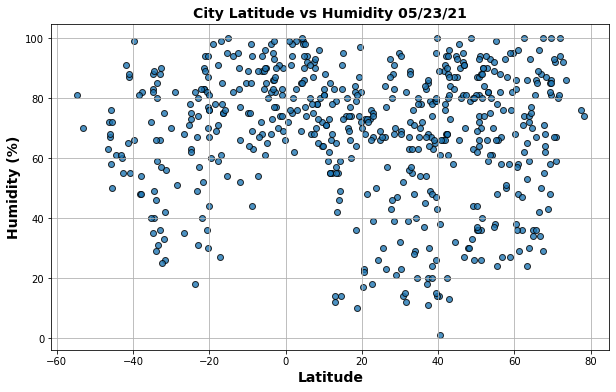

In [13]:
#Latitude vs Humidity
# Create Scatter Chart for Lat vs Humidity
plt.subplots(figsize=(10,6))
plt.scatter(lat, hum, label='cities', 
            edgecolor='black', linewidths=1, 
            alpha=0.8, marker='o')

# Add title and labels 
plt.title(f"City Latitude vs Humidity " + time.strftime('%x'), fontweight='semibold', fontsize=14)
plt.xlabel("Latitude", fontweight='demi', fontsize=14)
plt.ylabel("Humidity (%)", fontweight=550, fontsize=14)

# Add Grid
plt.grid()

# Save Fig and show 
plt.savefig('weather_data/Fig2.png')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

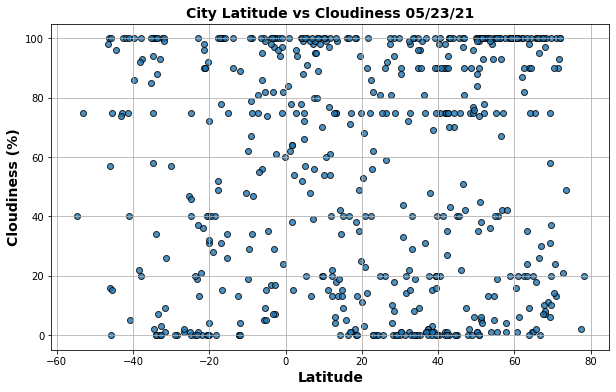

In [14]:
# Latitude vs Cloudiness
# Create Scatter Chart for Lat vs Cloudiness
plt.subplots(figsize=(10,6))
plt.scatter(lat, clouds, label='cities', 
            edgecolor='black', linewidths=1, 
            alpha=0.8, marker='o')

# Add title and labels 
plt.title(f"City Latitude vs Cloudiness " + time.strftime('%x'),
          fontweight='semibold', fontsize=14)
plt.xlabel("Latitude", fontweight='semibold', fontsize=14)
plt.ylabel("Cloudiness (%)",fontweight='semibold', fontsize=14)

# Add Grid
plt.grid()

# Save Fig and show 
plt.savefig('weather_data/Fig3.png')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

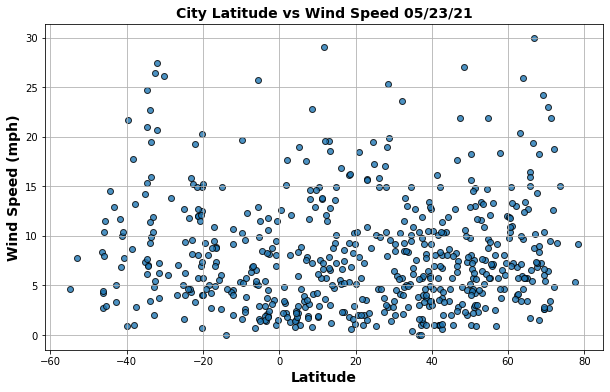

In [15]:
# Latitude vs Wind Speed
# Create Scatter Chart for Lat vs Wind Speed
plt.subplots(figsize=(10,6))
plt.scatter(lat, wind, label='cities', 
            edgecolor='black', linewidths=1, 
            alpha=0.8, marker='o')

# Add title and labels 
plt.title(f"City Latitude vs Wind Speed " + time.strftime('%x'),
          fontweight='semibold', fontsize=14)
plt.xlabel("Latitude", fontweight='semibold', fontsize=14)
plt.ylabel("Wind Speed (mph)",fontweight='semibold', fontsize=14)

# Add Grid
plt.grid()

# Save Fig and show 
plt.savefig('weather_data/Fig4.png')
plt.show

In [16]:
# Linear Regression of Data by Hemisphere
# Linear Regression Function

# Create a linear regression function 
def plot_linear_regression(x_values, y_values, title, y_label, text_coord):
    
    # Get linear regression data 
    (slope, intercept, r_value, p_value, stderr) = linregress(x_values, y_values)
    lin_reg_lst = (slope, intercept, r_value, p_value, stderr)
    lin_reg_df = pd.DataFrame({"Slope":slope,
                               "Intercept":intercept,
                               "r Value":r_value,
                               "p Value":p_value,
                               "Std Error":stderr}, index=[0])
    
    print(lin_reg_df)
    # Calculate regress y_values using linear regression data above 
    regress_values = x_values * slope + intercept
    
    # Get equation for linear regression line 
    line_eq = "y= " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create Scatter plot with linear regression line 
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, color="r")
    
    # Annotate text for linear regression equation 
    plt.annotate(line_eq, text_coord, fontsize=15, color="red")
    
    # Add title and labels
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()
    
    

In [17]:
# Create Northern and Southern Hemisphere DFs
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

      Slope  Intercept   r Value       p Value  Std Error
0 -0.679007  89.769455 -0.799218  3.929553e-91   0.025437


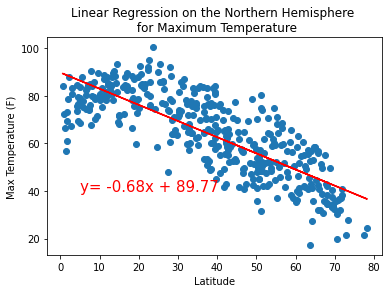

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 432x288 with 0 Axes>

In [29]:
# Linear Regression for Latitude vs Max Temperature by Hemisphere
# Create Northern Hemisphere Chart

plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"],
                       "Linear Regression on the Northern Hemisphere \n for Maximum Temperature",
                       "Max Temperature (F)", (5,40))
plt.savefig('weather_data/Fig5.png')
plt.show

      Slope  Intercept   r Value       p Value  Std Error
0  0.575657  79.577357  0.673125  1.186546e-23    0.04894


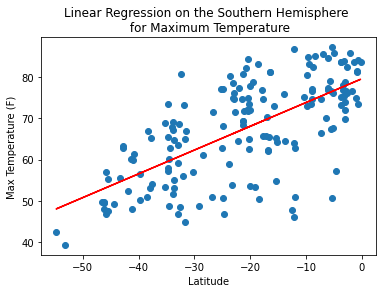

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 432x288 with 0 Axes>

In [30]:
# Create Southern Hemisphere Chart
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"],
                       "Linear Regression on the Southern Hemisphere \n for Maximum Temperature",
                       "Max Temperature (F)", (-30,36))
plt.savefig('weather_data/Fig6.png')
plt.show

      Slope  Intercept   r Value   p Value  Std Error
0 -0.050105  69.050897 -0.044551  0.371189   0.055967


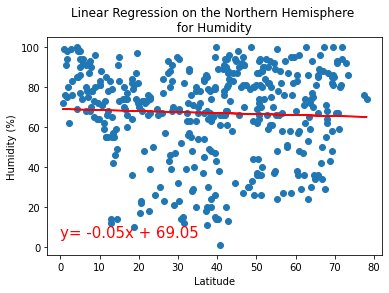

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 432x288 with 0 Axes>

In [31]:
# Linear Regression for Latitude vs Humidity by Hemisphere
# Create Northern Hemisphere Chart
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"],
                       "Linear Regression on the Northern Hemisphere \n for Humidity ",
                       "Humidity (%)", (0,5))
plt.savefig('weather_data/Fig7.png')
plt.show

      Slope  Intercept   r Value   p Value  Std Error
0  0.455766  80.927929  0.341029  0.000006   0.097218


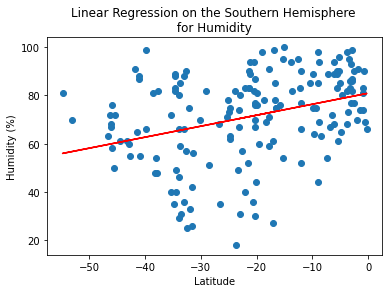

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 432x288 with 0 Axes>

In [32]:
# Create Southern Hemisphere Chart
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"],
                       "Linear Regression on the Southern Hemisphere \n for Humidity ",
                       "Humidity (%)", (-30,5))
plt.savefig('weather_data/Fig8.png')
plt.show

      Slope  Intercept   r Value   p Value  Std Error
0 -0.021668  54.993886 -0.011088  0.823952   0.097336


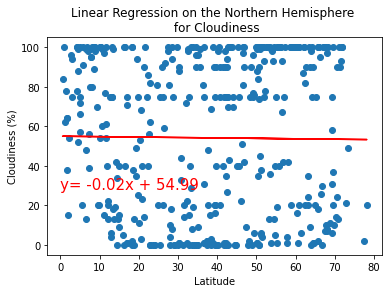

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 432x288 with 0 Axes>

In [33]:
# Linear Regression for Latitude vs Cloudiness by Hemisphere
# Create Northern Hemisphere Chart
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"],
                       "Linear Regression on the Northern Hemisphere \n for Cloudiness",
                       "Cloudiness (%)", (0,28))
plt.savefig('weather_data/Fig9.png')
plt.show

      Slope  Intercept   r Value   p Value  Std Error
0  0.130202  57.779554  0.046597  0.547448   0.215989


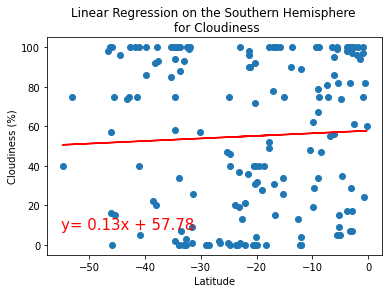

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 432x288 with 0 Axes>

In [34]:
# Create Southern Hemisphere Chart
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"],
                       "Linear Regression on the Southern Hemisphere \n for Cloudiness",
                       "Cloudiness (%)", (-55,8))
plt.savefig('weather_data/Fig10.png')
plt.show

      Slope  Intercept   r Value  p Value  Std Error
0  0.028507   6.862274  0.103782  0.03682   0.013609


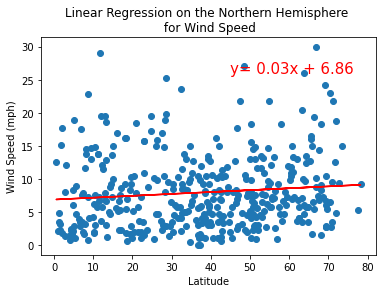

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 432x288 with 0 Axes>

In [35]:
# Linear Regression for Latitude vs Wind Speed by Hemisphere
# Create Northern Hemisphere Chart
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"],
                       "Linear Regression on the Northern Hemisphere \n for Wind Speed",
                       "Wind Speed (mph)", (45,26))
plt.savefig('weather_data/Fig11.png')
plt.show

      Slope  Intercept   r Value   p Value  Std Error
0 -0.103071   6.116756 -0.248448  0.001126   0.031096


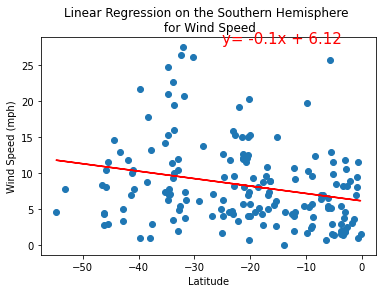

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 432x288 with 0 Axes>

In [36]:
# Create Southern Hemisphere Chart
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"],
                       "Linear Regression on the Southern Hemisphere \n for Wind Speed",
                       "Wind Speed (mph)", (-25,28))
plt.savefig('weather_data/Fig12.png')
plt.show